# Multiple Regression.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv(r"D:\Downloads\FCS\Machine Learning-A-Z-Codes-Datasets\Machine Learning A-Z (Codes and Datasets)\Part 2 - Regression\Section 5 - Multiple Linear Regression\Python\50_Startups.csv")

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


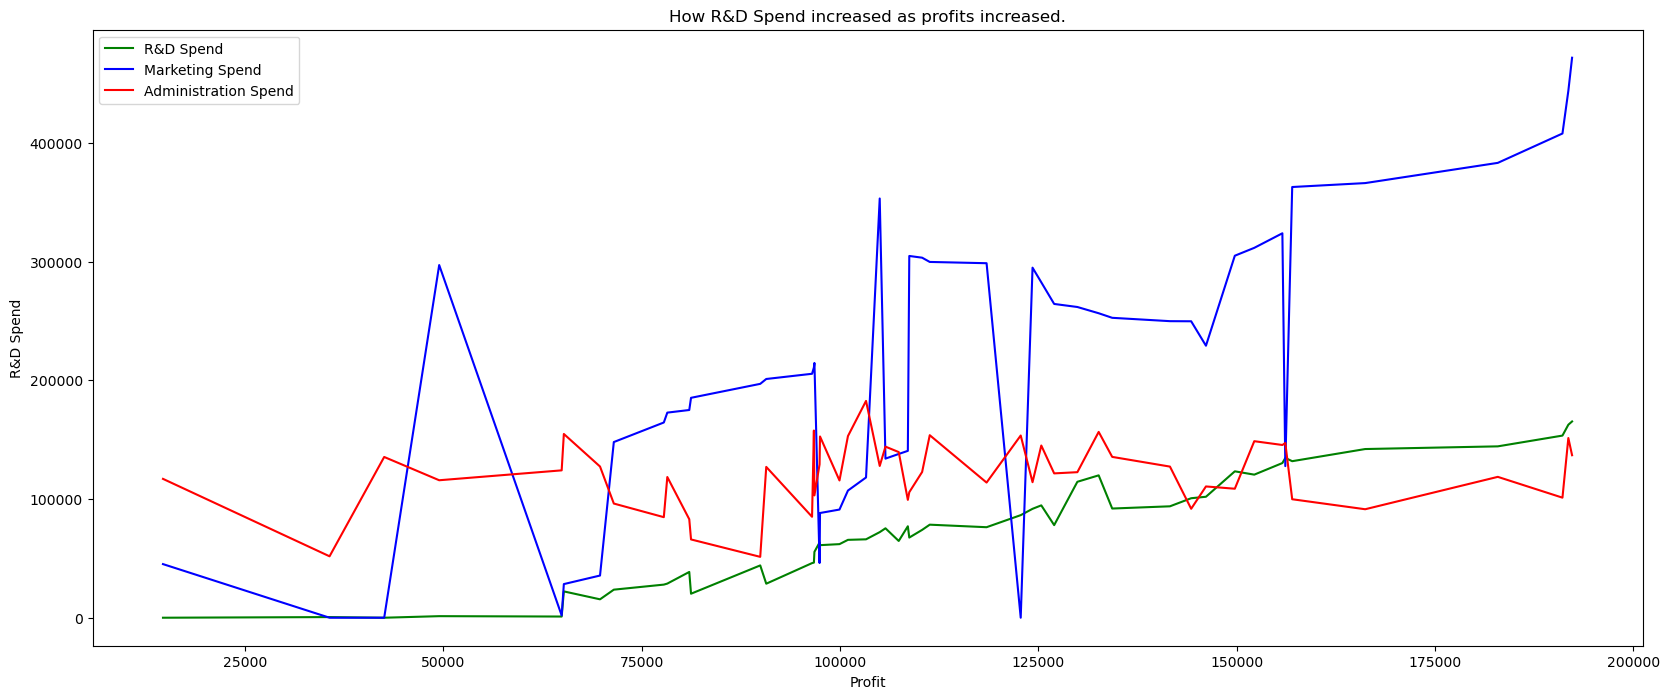

In [4]:
plt.figure(figsize=(20,8))

plt.plot(df.Profit, df['R&D Spend'], color = 'green')
plt.plot(df.Profit, df['Marketing Spend'], color = 'blue')
plt.plot(df.Profit, df['Administration'], color = 'red')

plt.title("How R&D Spend increased as profits increased.")
plt.xlabel("Profit")
plt.ylabel("R&D Spend")

plt.legend(["R&D Spend", "Marketing Spend", "Administration Spend"], loc=0, frameon=True)

plt.show()

# **Making a scatter plot.**

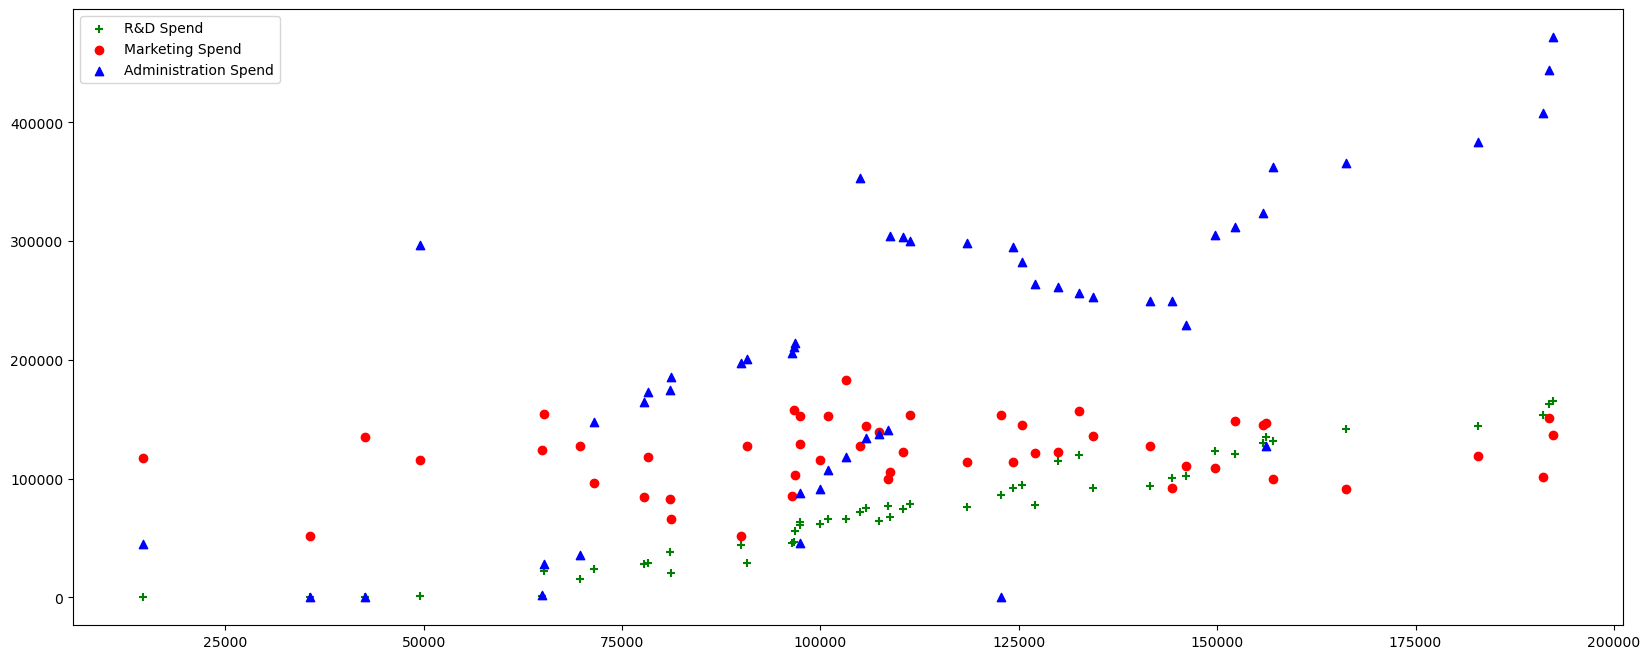

In [5]:
plt.figure(figsize=(20, 8))
plt.scatter(df.Profit, df['R&D Spend'], color='green', marker='+')
plt.scatter(df.Profit, df['Administration'], color='red')
plt.scatter(df.Profit, df['Marketing Spend'], color='blue', marker='^')
plt.legend(["R&D Spend", "Marketing Spend", "Administration Spend"], loc = 0)
plt.show()

# Model Making

***Test train split***

In [6]:
X = df.iloc[:,:4]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, shuffle = 0)

***Data preprocessing***

In [7]:
len(y_test)

13

In [8]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [9]:
df['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

***Encoding Categorical Data without using column transformer***

In [10]:
# # OHE = pd.get_dummies(df, columns=['State'], drop_first = True)
# # # Drop_first is used to remove dummy variable trap i.e. Multicolinearity.
#
# ohe = OneHotEncoder(drop='first', dtype=np.int32)
# X_train_new = ohe.fit_transform(X_train[['State']]).toarray()
# X_test_new = ohe.fit_transform(X_test[['State']]).toarray()

In [11]:
# np.hstack((X_train[['State']].values, X_train_new))

***Encoding with Column transformer.***

In [12]:
CT = ColumnTransformer(transformers=[
    # name,   transformer,     column
    ('name1', OneHotEncoder(), ['State'])
], remainder='passthrough')

In [13]:
X_test = np.array(CT.fit_transform(X_test))

In [14]:
X_train = np.array(CT.fit_transform(X_train))

#Traning multiple Regression model.

In [15]:
# No need to apply feature Scaling in Multiple regression.
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [16]:
type(y_pred)

numpy.ndarray

In [17]:

concatenated_arrays = np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.values.reshape(len(y_test), 1)), axis = 1)
newdf = pd.DataFrame(concatenated_arrays)

# Assign names to the columns
newdf.columns = ['y_pred', 'y_test']
newdf


,y_pred,y_test
0,104440.725826,103282.38
1,132253.815677,144259.40
2,132872.071743,146121.95
3,71707.787714,77798.83
4,178678.993499,191050.39
5,115078.131243,105008.31
6,66093.929727,81229.06
7,98759.727641,97483.56
8,114113.599409,110352.25
9,167979.494115,166187.94


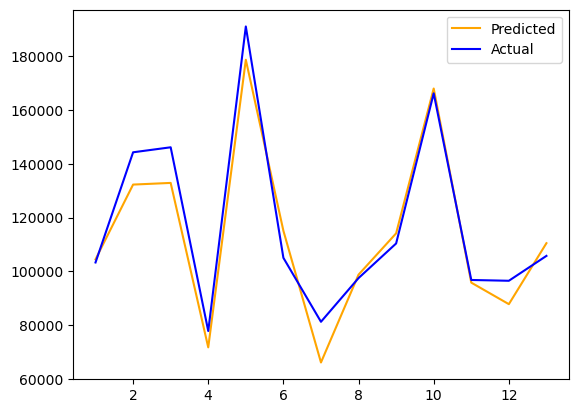

In [18]:
X_Dummy_values = np.array(range(1, 14))
plt.plot(X_Dummy_values, y_pred, color='orange')
plt.plot(X_Dummy_values, y_test, color='blue')
plt.legend(['Predicted', 'Actual'])
plt.show()

In [25]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(mae)

7024.539954003748
73809312.88226646
8591.234654126638


In [21]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred, normalize=False)

ValueError: continuous is not supported